In [39]:
from snownlp import SnowNLP
from snownlp import sentiment
import nltk
from nltk.probability import FreqDist

from pathlib import Path

import pandas as pd 
import numpy as np
import os

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

In [147]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing Data

### Data Scraped from Weibo, Round 1

In [21]:
korea_biowar = pd.read_excel('scraped_korean_biowar.xlsx')
korea_biowar = korea_biowar.sort_values(by='Date')

kbiowar_trimmed = korea_biowar.set_index('Date')

kbiowar_startdate = pd.to_datetime("2019-12-15").date()
kbiowar_enddate = pd.to_datetime("2021-06-29").date()
kbiowar_trimmed = kbiowar_trimmed.loc[kbiowar_startdate:kbiowar_enddate]

In [17]:
covid_origins = pd.read_excel('scraped_covid_origins.xlsx')
covid_origins = covid_origins.sort_values(by='Date')

In [27]:
unit_731 = pd.read_excel('scraped_731_unit.xlsx')
unit_731 = unit_731.sort_values(by='Date')

u731_trimmed = unit_731.set_index('Date')

u731_startdate = pd.to_datetime("2019-12-15").date()
u731_enddate = pd.to_datetime("2021-07-01").date()
u731_trimmed = u731_trimmed.loc[u731_startdate:u731_enddate]

### Data Scraped from Weibo, Round 2

In [117]:
origins_hot = pd.read_excel('Weibo_COVID_origins_hot.xlsx')
fd_hot = pd.read_excel('Weibo_FD_hot.xlsx')

In [198]:
unit_731_hot = pd.read_excel('Weibo_731_hot.xlsx')
unit_731_hot = unit_731_hot.sort_values(by = 'Date')

unit_731_hot_trimmed = unit_731_hot.set_index('Date')

unit_731_startdate = pd.to_datetime("2020-01-01").date()
unit_731_enddate = pd.to_datetime("2021-07-09").date()
unit_731_hot_trimmed = unit_731_hot_trimmed.loc[unit_731_startdate:unit_731_enddate]

### Data Scraped from Weibo, Round 3

In [302]:
def df_trim(data):
    data = data.sort_values('Date')
    
    data_trimmed = data.set_index('Date')
    
    startdate = pd.to_datetime("2021-01-01").date()
    enddate = pd.to_datetime("2021-07-01").date()
    data_trimmed = data_trimmed.loc[startdate:enddate]
    
    return data_trimmed

In [303]:
covid_origins_new = pd.read_excel('COVID_Origins_and_sentiments.xlsx')
covid_origins_new_trimmed = df_trim(covid_origins_new)

In [304]:
u731_new = pd.read_excel('U731_and_sentiments.xlsx')
u731_new_trimmed = df_trim(u731_new)

### Data Scraped from Weibo, Round 4

In [2]:
smoa_jan = pd.read_excel('Weibo_SMOA_Jan_2020.xlsx')
smoa_feb = pd.read_excel('Weibo_SMOA_Feb_2020.xlsx')

In [33]:
smoa_mar = pd.read_excel('Weibo_SMOA_Mar_2020.xlsx')
smoa_after = pd.concat([smoa_feb, smoa_mar])

In [88]:
smoa = pd.concat([smoa_jan, smoa_after])

### Data Scraped from Weibo, Round 5

In [317]:
origins = pd.read_excel('COVID_Origins_and_sentiments.xlsx')

In [318]:
fd = pd.read_excel('origins_fd.xlsx')

### Harvard Dataverse Repository 

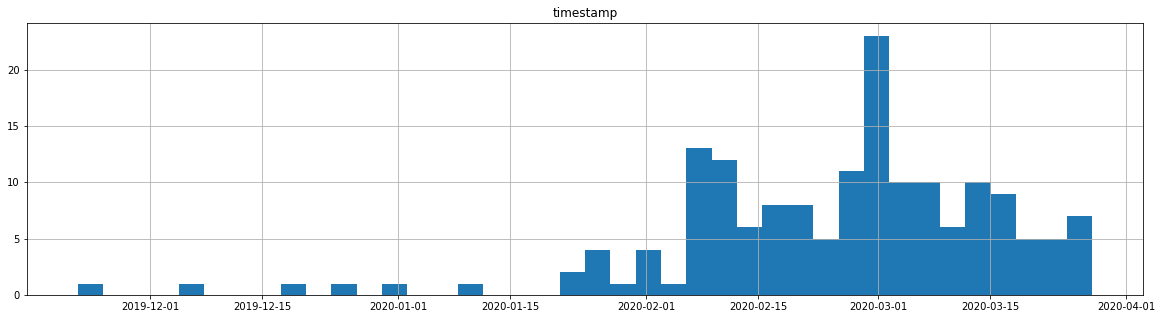

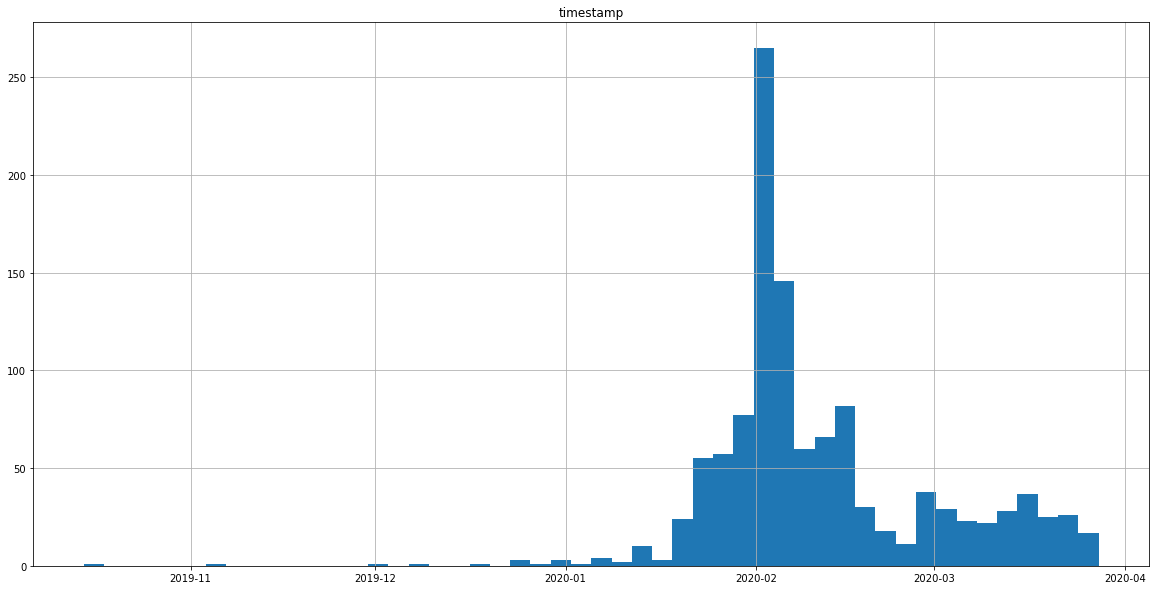

NameError: name 'sample_new_df' is not defined

NameError: name 'sample_new_df' is not defined

In [165]:
%run weibodataprocessing.ipynb

In [167]:
origin_before_april = new_df[new_df['content'].str.contains('新冠|病毒|疫情', regex = True)]
origin_before_april = origin_before_april[origin_before_april['content'].str.contains('溯源|来源|源头', regex = True)]

In [170]:
origin_before_april.head()

,From,content,repost,timestamp,user_id,weibo_id,imgs
644,微博视频,【请转发扩散🙏中国人，别再乱吃野生动物了】钟南山院士：我们到武汉去看，那个所谓海鲜市场，相当...,NaN,2020-01-29 15:53:00,4945255377,4466098894581254,[]
1012,微博 weibo.com,#疫情播报#【新加坡新增3例确诊病例】新加坡卫生部今天（29日）傍晚宣布，截止到当天下午2点...,NaN,2020-01-29 19:55:00,7899393460,4466159648668133,NaN
1018,NaN,#疫情联防联控实时播报#广东确诊5例外籍和境外人士感染今天下午，广东省政府通报，目前广东确诊...,NaN,2020-01-29 19:55:00,4923595088,4466159686984216,NaN
1302,搜狐新闻客户端,搜狐新闻:【辟谣！这些新型肺炎传言是假的 – 科学溯源：到底是谁把新冠状病毒带到了武汉】O网...,NaN,2020-01-29 19:54:00,3889331423,4466159518939779,[//ww3.sinaimg.cn/orj360/64278893ly1gbdog3zugk...
1333,NaN,#漯河##河南防控新型肺炎疫情#【疫情通报：漯河市全部9例确诊病例详情】2020年1月28日...,NaN,2020-01-29 19:55:00,5145510678,4466159765843375,[//ww2.sinaimg.cn/orj360/005M4qWlly1gbdogu3hr7...


### Data Scraped from RMRB

In [8]:
origin_RMRB = pd.read_excel('RMRB_Covid_Origins.xlsx')

In [9]:
origin_RMRB['Date'] = pd.to_datetime(origin_RMRB['Date'])
origin_RMRB.rename(columns = {'preview text':'Text'}, inplace = True)
origin_RMRB.head()

,Title,Date,Text,URL,Source
0,赵立坚就新冠病毒溯源六问美国,2021-06-17 19:45:49,针对美方一些人近来继续炒作新冠病毒溯源问题一事，外交部发言人赵立坚6月17日表示，中国科学家...,http://usa.people.com.cn/n1/2021/0618/c241376-...,来源：主站新闻
1,美国新冠溯源阴谋论散播“三大病毒”,2021-06-01 19:22:00,新华社北京6月1日电（国际观察）美国新冠溯源阴谋论散播“三大病毒” 新华社记者 ...,http://usa.people.com.cn/n1/2021/0602/c241376-...,来源：主站新闻
2,美国新冠溯源阴谋论散播“三大病毒”,2021-06-01 03:48:21,新华社北京6月1日电（国际观察）美国新冠溯源阴谋论散播“三大病毒” 新华社记者 近期，美...,http://world.people.com.cn/n1/2021/0601/c1002-...,来源：主站新闻
3,新冠病毒溯源“拼图”一块都不能少,2021-02-06 17:59:02,世界卫生组织卫生紧急项目技术负责人玛丽亚·范凯尔克霍弗5日表示，多国研究机构在2019年12...,http://js.people.com.cn/n2/2021/0207/c359574-3...,来源：地方新闻
4,新冠病毒溯源不能政治化,2020-05-29 09:31:13,原标题：新冠病毒溯源不能政治化 新冠病毒仍然是未解之谜，许多科学家和医学专家正就病毒源...,http://js.people.com.cn/n2/2020/0529/c360298-3...,来源：地方新闻


# Histogram Visualizations

In [115]:
korea_hist = kbiowar_trimmed.reset_index().hist(column = 'Date', bins = 100, figsize = (20, 5))
origins_hist = covid_origins.hist(column = 'Date', bins = 100, figsize = (20, 5))
unit_731_hist = u731_trimmed.reset_index().hist(column = 'Date', bins = 100, figsize = (20, 5))

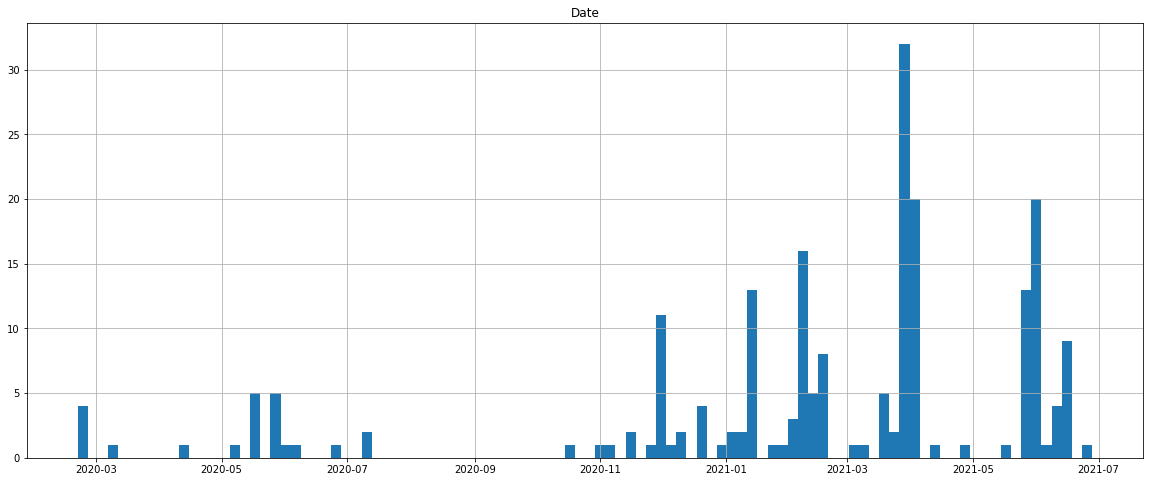

In [180]:
RMRB_hist = origin_RMRB.hist(column = 'Date', bins = 100, figsize = (20,8))

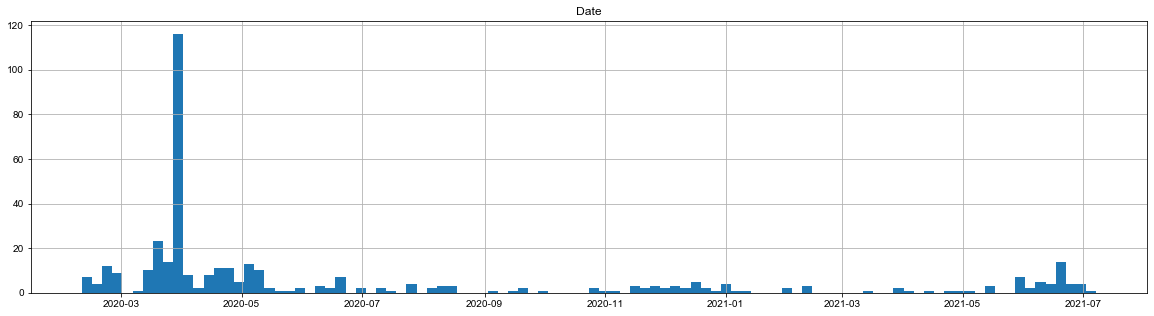

In [346]:
origins_hot_hist = origins_hot.hist(column = 'Date', bins = 100, figsize = (20, 5))

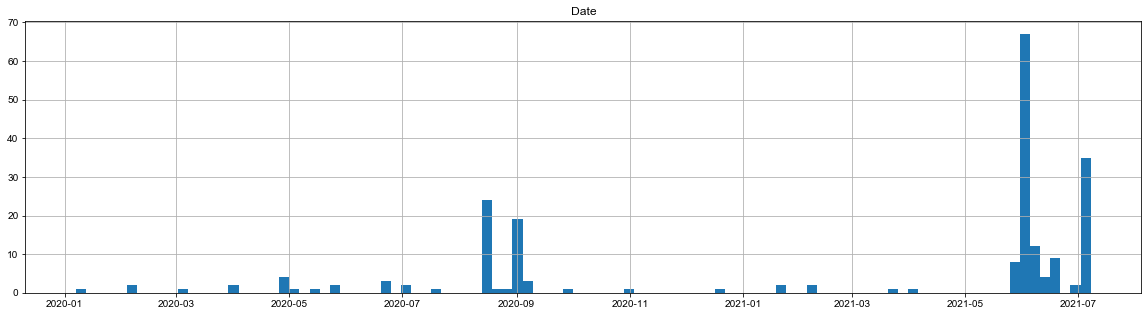

In [347]:
unit_731_hot_hist = unit_731_hot_trimmed.reset_index().hist(column = 'Date', bins = 100, figsize = (20, 5))

In [326]:
#fd_hot_hist = fd_hot.hist(column = 'Date', bins = 100, figsize = (20, 5))

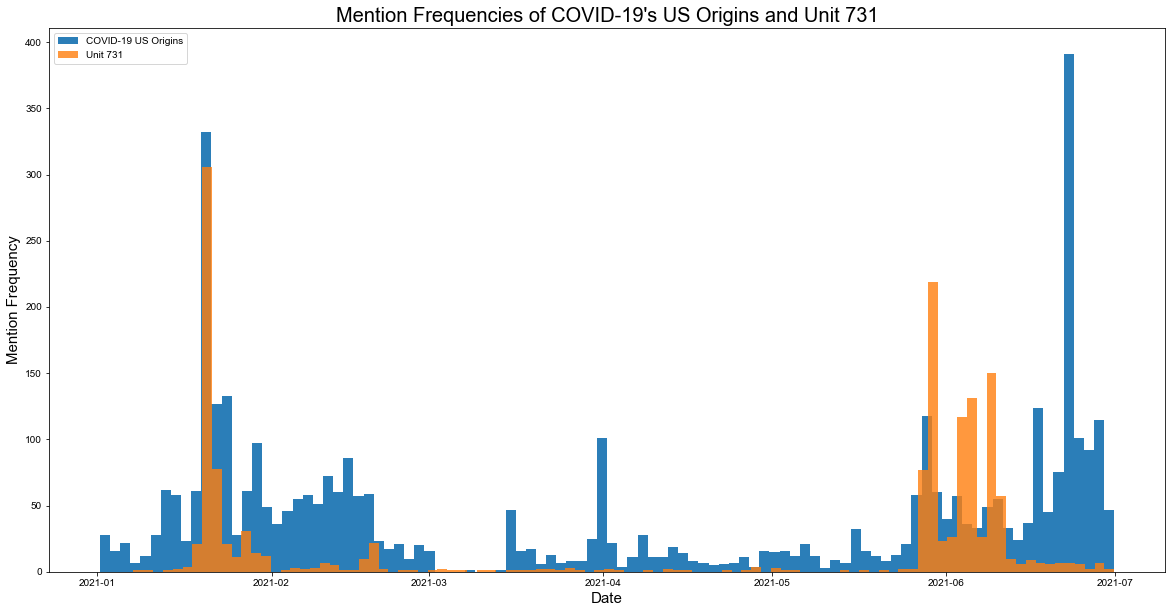

In [316]:
plt.figure(figsize = (20,10))

plt.hist(covid_origins_new_trimmed.reset_index()['Date'], bins = 100, alpha = 0.95, label = 'COVID-19 US Origins')
plt.hist(u731_new_trimmed.reset_index()['Date'], bins = 100, alpha = 0.8, label = 'Unit 731')
plt.title("Mention Frequencies of COVID-19's US Origins and Unit 731", fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Mention Frequency', fontsize = 15)
plt.legend()

plt.show()

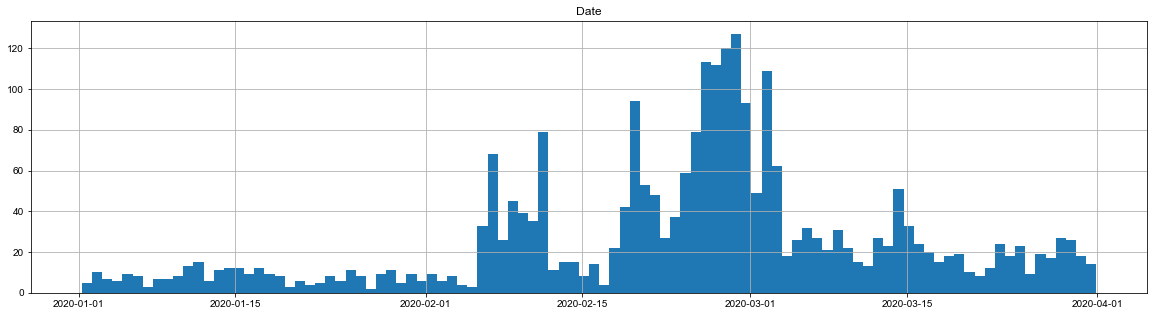

In [89]:
smoa_hist = smoa.hist(column = 'Date', bins = 100, figsize = (20,5))

In [132]:
smoa_west = smoa[smoa['Text'].str.contains('西方|欧美|美国', regex = True)]

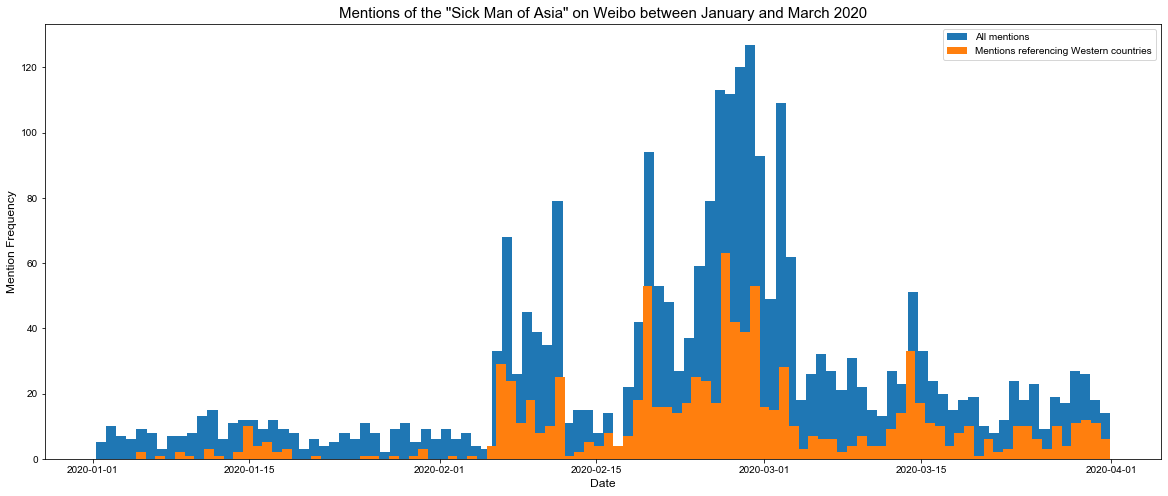

In [328]:
plt.figure(figsize = (20, 8))
plt.title('Mentions of the "Sick Man of Asia" on Weibo between January and March 2020', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Mention Frequency', fontsize = 12)
smoa_hist = plt.hist(smoa['Date'], bins = 100, label = 'All mentions')
smoa_west_hist = plt.hist(smoa_west['Date'], bins = 100, label = 'Mentions referencing Western countries')
plt.legend()

# SM Engagement Visualizations

In [30]:
combined_df = pd.concat([kbiowar_trimmed, covid_origins, u731_trimmed])
combined_df.drop_duplicates()

,Text,Likes,Author,Shares,Date
2020-01-16 09:18:00,非典的发生有阴谋论之说，这次武汉的新型冠状病毒怎么又发生在我国？武汉，九省通衢之地，春节，3...,9,老冯说|@老冯说,4,NaT
2020-01-27 21:58:00,齐德学 | 抗美援朝战争中的反细菌战是中国方面的造假宣传吗？ O齐德学 | 抗美援朝战争中的...,0,胸怀家国天下,0,NaT
2020-01-27 23:26:00,#察古知今#【抗美援朝战争中的反细菌战是中国方面的造假宣传吗】O网页链接 美国当局一直对美军...,3,察网微博,2,NaT
2020-01-28 00:54:00,1952年1月28日，志愿军第42军第375团战士李广福在美军飞机过后的驻地金谷里雪地上发现...,0,沽上秋影,1,NaT
2020-01-29 11:31:00,抗美援朝战争中的反细菌战是中国方面的造假宣传吗？ O抗美援朝战争中的反细菌战是中国方面的造假...,1,sycf会幸福f1,2,NaT
...,...,...,...,...,...
2021-06-29 00:29:00,我曹尼玛，看了个电影解说731部队的，气疯了，现在很想穿越回去抗日 ​,0,玉玉小桂狗,0,NaT
2021-06-29 12:00:00,#徐锦江看到解放碑感动落泪# 徐锦江带着儿子到人民解放纪念碑前，放下雨伞，捂住胸口静静注视着...,3409,新浪娱乐,151,NaT
2021-06-29 12:05:00,✨🌙 ​,14725,唐艺昕,1790,NaT
2021-06-29 12:13:00,【视频来了！#昨晚鸟巢上空焰火盛放#】6月28日晚，庆祝中国共产党成立100周年文艺演出《伟...,5247,北京晚报,822,NaT


In [96]:
combined_df.reset_index().plot(kind = 'scatter', x = 'Likes', y = 'Shares', figsize = (20,20))

# LDA Topic Modeling

### Segmentation/Tokenization

In [237]:
import jieba
import re

In [322]:
#segmentation & removing stopwords

stopwords_df = pd.read_csv('stopwords-zh.txt', header = None)
extra_characters = ['新冠', '病毒','溯源', '组织', '研究', '问题', '开展', '国际','源头','可能'
                   ,'标题','文章','东亚','亚洲','视频','链接']
# more extra characters: '新冠', '病毒','溯源', '世卫', '组织', '科学', '研究', '问题', '开展', '国际', '疫情','肺炎','病例'

extra_characters_df = pd.DataFrame(extra_characters)
stopwords_df = pd.merge(stopwords_df, extra_characters_df, how = 'outer')

def sentence_seg(sentence):
    outlist = []
    sentence1 = ''
    
    #for word in re.findall(r'[\u4e00-\u9fff]+', sentence):
        #sentence1 += word
        
    sentence_seged = jieba.cut(sentence.strip())
    
    for word in sentence_seged:
        if word not in stopwords_df.values:
            outlist.append(word)
            
    return outlist 

### Building & Training the LDA Model

In [5]:
#building LDA model

import gensim
import gensim.corpora as corpora
from pprint import pprint

from gensim.models import CoherenceModel

def LDA_Model_Building(input_data, start, limit, step):
    
    data_words = []

    for item in input_data:
        data_words.append(sentence_seg(item))
        
    data_words = bigrams_and_trigrams(data_words)
    
    id2words = corpora.Dictionary(data_words)
    texts = data_words
    corpus = [id2words.doc2bow(text) for text in texts]
    
    corpus = tfidf(corpus, id2words)

    #building the model with optimal topic number

    #num_topics = 20
    coherence = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                               id2word = id2words, 
                                               num_topics = num_topics,
                                               passes = 20,
                                               per_word_topics = True)
        #warnings.filterwarnings("ignore", category = UserWarning)
        model_list.append(lda_model)
        coherence_score = CoherenceModel(model = lda_model, texts = texts, dictionary = id2words, coherence = 'c_v')
        coherence.append(coherence_score.get_coherence())
        
    best_model_index = np.argmax(coherence)
    best_model = model_list[best_model_index]

    #pprint(lda_model.print_topics())
    #doc_lda = lda_model[corpus]
    
    return model_list, coherence, best_model, corpus, id2words, data_words

In [6]:
# bigrams and trigrams

def bigrams_and_trigrams(data):
    bigram_phrases = gensim.models.Phrases(data, min_count = 5, threshold = 30)
    trigram_phrases = gensim.models.Phrases(bigram_phrases[data], min_count = 5, threshold = 30)
    
    bigram = gensim.models.phrases.Phraser(bigram_phrases)
    trigram = gensim.models.phrases.Phraser(trigram_phrases)
    
    def make_bigrams(texts):
        return (bigram[doc] for doc in texts)
    
    def make_trigrams(texts):
        return (trigram[bigram[doc]] for doc in texts)
    
    data_bigrams = make_bigrams(data)
    data_trigrams = make_trigrams(data_bigrams)
    
    return data

In [7]:
# TF-IDF removing common words
from gensim.models import TfidfModel

def tfidf(corpus, id2words):

    tfidf = TfidfModel(corpus, id2word = id2words)

    #Filter low value words and also words missing in tfidf models.

    low_value = 0.035

    for i in range(0, len(corpus)):
        bow = corpus[i]
        low_value_words = [] 
        tfidf_ids = [id for id, value in tfidf[bow]]
        bow_ids = [id for id, value in bow]
        low_value_words = [id for id, value in tfidf[bow] if value < low_value]
        words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

        new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

    #reassign        
    corpus[i] = new_bow
    
    return corpus

### RMRB COVID Origins Topic Modeling

In [308]:
start, limit, step = 1, 15, 1
x = range(start, limit, step)
RMRB_models, RMRB_coherence, RMRB_best_model, RMRB_corpus, RMRB_dict = LDA_Model_Building(RMRB_input, start, limit, step)

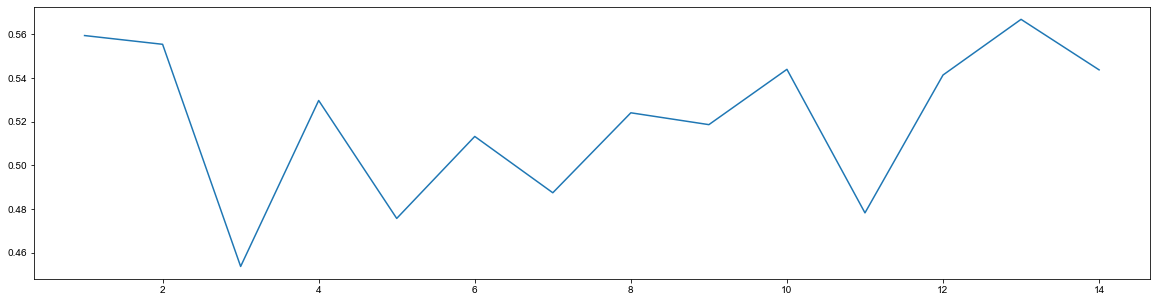

In [309]:
plt.figure(figsize=(20, 5))
plt.plot(x, RMRB_coherence)

In [310]:
pprint(RMRB_best_model.print_topics())

[(0,
  '0.024*"国家" + 0.017*"合作" + 0.017*"进行" + 0.016*"专家组" + 0.014*"专家" + '
  '0.012*"中国" + 0.011*"表示" + 0.011*"中方" + 0.010*"\u3000" + 0.010*"2019"'),
 (1,
  '0.028*"\u3000" + 0.016*"报告" + 0.015*"全球" + 0.015*"联合" + 0.014*"可能" + '
  '0.014*"中国" + 0.013*"疫情" + 0.012*"合作" + 0.011*"抗疫" + 0.011*"美国"'),
 (2,
  '0.035*"中方" + 0.033*"合作" + 0.020*"态度" + 0.018*"专家" + 0.015*"积极" + 0.014*"疫情" '
  '+ 0.014*"美国" + 0.013*"保持" + 0.012*"工作" + 0.012*"全球"'),
 (3,
  '0.015*"证据" + 0.015*"专家组" + 0.013*"病例" + 0.013*"美国" + 0.013*"中国" + '
  '0.012*"表示" + 0.011*"国家" + 0.011*"来源" + 0.010*"假设" + 0.009*"世界卫生组织"'),
 (4,
  '0.028*"\u3000" + 0.018*"中国" + 0.013*"表示" + 0.011*"工作" + 0.010*"记者" + '
  '0.010*"疫苗" + 0.010*"·" + 0.010*"德塞" + 0.010*"谭" + 0.009*"专家"'),
 (5,
  '0.030*"联合" + 0.029*"中国" + 0.025*"专家组" + 0.025*"全球" + 0.022*"工作" + '
  '0.021*"\u3000" + 0.017*"专家" + 0.016*"武汉" + 0.014*"中方" + 0.013*"报告"'),
 (6,
  '0.028*"中国" + 0.021*"工作" + 0.017*"表示" + 0.016*"合作" + 0.012*"联合" + '
  '0.012*"政治化" + 0.012*"科学家" + 0.011*"

In [322]:
RMRB_vis = pyLDAvis.gensim_models.prepare(RMRB_best_model, RMRB_corpus, RMRB_dict)

In [361]:
RMRB_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.135412  0.078034       1        1  20.511724
1     -0.111076 -0.027056       2        1  13.898031
4     -0.092123 -0.017001       3        1  12.409548
6     -0.109319 -0.046385       4        1  10.704638
12    -0.118610 -0.054764       5        1   9.073195
3     -0.011239  0.096447       6        1   6.761162
8      0.075993 -0.013611       7        1   4.478198
2     -0.015076  0.051689       8        1   4.307926
10     0.085326 -0.117973       9        1   4.141304
0     -0.034010  0.075265      10        1   3.851174
11     0.142828  0.048946      11        1   3.801854
7      0.114724 -0.195864      12        1   3.369195
9      0.207995  0.122273      13        1   2.692051, topic_info=    Term        Freq       Total Category  logprob  loglift
162   中方  133.000000  133.000000  Default  30.0000  30.0000
248   全球  269.000000  269.000000  Default  29.0000  29.0000
215   疫情  168.000000  168.000000  Default  28.0000  28.0000
178   可能  163.000000  163.000000  Default  27.0000  27.0000
24    合作  221.000000  221.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
876   10    3.052673   17.881168  Topic13  -5.1123   1.8471
234   进行    3.808842  120.540406  Topic13  -4.8910   0.1602
218   相关    3.058280   36.274990  Topic13  -5.1105   1.1416
385   情况    3.057686   38.139699  Topic13  -5.1107   1.0913
97    工作    2.960402  214.876127  Topic13  -5.1430  -0.6699

[873 rows x 6 columns], token_table=      Topic      Freq Term
term                      
76        1  0.374299    1
76        2  0.034027    1
76        3  0.238190    1
76        4  0.238190    1
76        7  0.051041    1
...     ...       ...  ...
411       2  0.043924   高度
411       3  0.043924   高度
411       7  0.131772   高度
411      10  0.043924   高度
412       1  0.881515   鼬科

[1720 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 7, 13, 4, 9, 3, 11, 1, 12, 8, 10])

In [25]:
from nltk.book import *

RMRB_df = []

for item in RMRB_input:
    RMRB_df.extend(sentence_seg(item))

RMRB_df

['美方',
 '近来',
 '继续',
 '炒作',
 '新冠',
 '病毒',
 '溯源',
 '问题',
 '一事',
 '外交部',
 '发言人',
 '赵立坚',
 '6',
 '17',
 '表示',
 '中国',
 '科学家',
 '最早',
 '发现',
 '新冠',
 '病毒基因',
 '序列',
 '意味着',
 '武汉',
 '新冠',
 '病毒',
 '源头',
 '不能',
 '借此',
 '推断出',
 '病毒',
 '中国',
 '科学家',
 '制造',
 '相比之下',
 '武汉',
 '团队',
 '应该',
 '获得',
 '新冠',
 '病毒',
 '研究',
 '诺贝尔',
 '医学奖',
 '指责',
 ' ',
 ' ',
 '\u3000',
 '\u3000',
 '赵立',
 '坚说',
 '中国',
 '一贯',
 '开放',
 '透明',
 '态度',
 '世卫',
 '组织',
 '开展',
 '新冠',
 '病毒',
 '溯源',
 '合作',
 '已经',
 '两次',
 '邀请',
 '世卫',
 '组织',
 '专家',
 '来华',
 '2019',
 '7',
 '弗吉尼亚州',
 '北部',
 '出现',
 '不明',
 '原因',
 '呼吸系统',
 '疾病',
 '威斯康星州',
 '暴发',
 '大规模',
 '电子',
 '烟',
 '疾病',
 '这同',
 '新冠',
 '病毒',
 '关系',
 '美国',
 '国家卫生研究院',
 '新冠',
 '病毒',
 '2019',
 '12',
 '美国',
 '出现',
 '美方',
 '对此',
 '解释',
 '美方',
 '要求',
 '情报部门',
 '科学家',
 '搞',
 '溯源',
 '研究',
 '美方',
 '不像',
 '中国',
 '秉持',
 '公开',
 '透明',
 '科学',
 '态度',
 '邀请',
 '世卫',
 '组织',
 '专家',
 '赴美国',
 '开展',
 '溯源',
 '研究',
 '来源',
 '新华社',
 '微博',
 '新华社',
 '北京',
 '6',
 '1',
 '日电',
 '国际',
 '观察',
 '美国',
 '新冠',
 '溯源',
 '阴谋论',
 '散

### Weibo COVID origins topic modeling

In [323]:
start, limit, step = 10, 11, 5
fd_models, fd_coherence, fd_best_model, fd_corpus, fd_dict = LDA_Model_Building(fd['Text'].astype(str), start, limit, step)

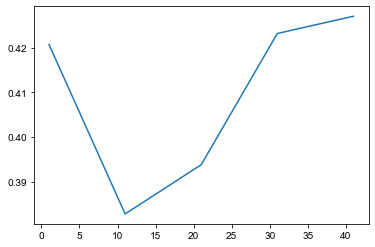

In [320]:
x = range(start, limit, step)
plt.plot(figsize = (20, 5))
plt.plot(x, origins_hot_coherence)

In [325]:
fd_coherence

[0.3983271446403754]

In [324]:
pprint(fd_best_model.print_topics())

[(0,
  '0.053*"美国" + 0.048*" " + 0.041*"特里" + 0.040*"克堡" + 0.040*"德" + 0.029*"实验室" '
  '+ 0.024*"生物" + 0.017*"\u200b" + 0.015*"基地" + 0.012*"“"'),
 (1,
  '0.067*" " + 0.032*"美国" + 0.014*":" + 0.011*"德" + 0.011*"克堡" + 0.011*"特里" + '
  '0.010*"科学" + 0.009*"中国" + 0.009*"实验室" + 0.008*"\u200b"'),
 (2,
  '0.024*"中国" + 0.022*"美国" + 0.022*"美方" + 0.019*"武汉" + 0.019*"科学家" + '
  '0.016*"发现" + 0.014*"赵立坚" + 0.014*" " + 0.014*"世卫" + 0.013*"应该"'),
 (3,
  '0.049*"美国" + 0.036*"中国" + 0.028*"调查" + 0.016*" " + 0.012*"专家" + 0.011*"证据" '
  '+ 0.009*"”" + 0.009*"“" + 0.009*"起源" + 0.008*"俄"'),
 (4,
  '0.079*"调查" + 0.066*"彻底" + 0.052*"美国" + 0.044*"中方" + 0.035*"呼吁" + 0.030*"美方" '
  '+ 0.021*" " + 0.016*"三个" + 0.015*"外交部" + 0.015*"赵立坚"'),
 (5,
  '0.010*"美国" + 0.007*"基地" + 0.006*"秘密" + 0.006*"克堡" + 0.006*"特里" + 0.005*"一直" '
  '+ 0.005*"代孕" + 0.005*"意外" + 0.005*"受伤" + 0.005*"事件"'),
 (6,
  '0.043*"美国" + 0.025*" " + 0.024*"德" + 0.023*"中国" + 0.019*"特里" + 0.019*"克堡" + '
  '0.008*"731" + 0.008*"”" + 0.008*"“" + 0.008*"

### SMOA Topic Modeling

##### After

In [51]:
start, limit, step = 1, 10, 1
smoa_after_models, smoa_after_coherence, smoa_after_best_model, smoa_after_corpus, smoa_after_dict, smoa_data_words = LDA_Model_Building(smoa_after['Text'].astype(str), start, limit, step)

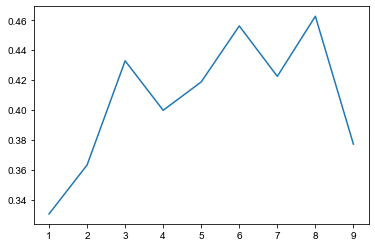

In [52]:
x = range(start, limit, step)
plt.plot(figsize = (20, 5))
plt.plot(x, smoa_after_coherence)

In [299]:
from collections import Counter
import matplotlib.colors as mcolors
from translate import Translator

def topic_vis(lda_model, rows):
    
    topics = lda_model.show_topics(formatted=False)
    data_flat = [w for w_list in data_words for w in w_list]
    counter = Counter(data_flat)

    out = []
    #translator = Translator(to_lang = 'en', from_lang = 'zh')
    
    for i, topic in topics:
        for word, weight in topic:
            #word = translator.translate(word)
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(rows, 2, figsize=(10,15), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.060); ax.set_ylim(0, 6500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=15)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize=5)
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('"Sick Man of Asia" Topic Model, January', fontsize=18, y=1.05)    
    plt.show()
    
    return

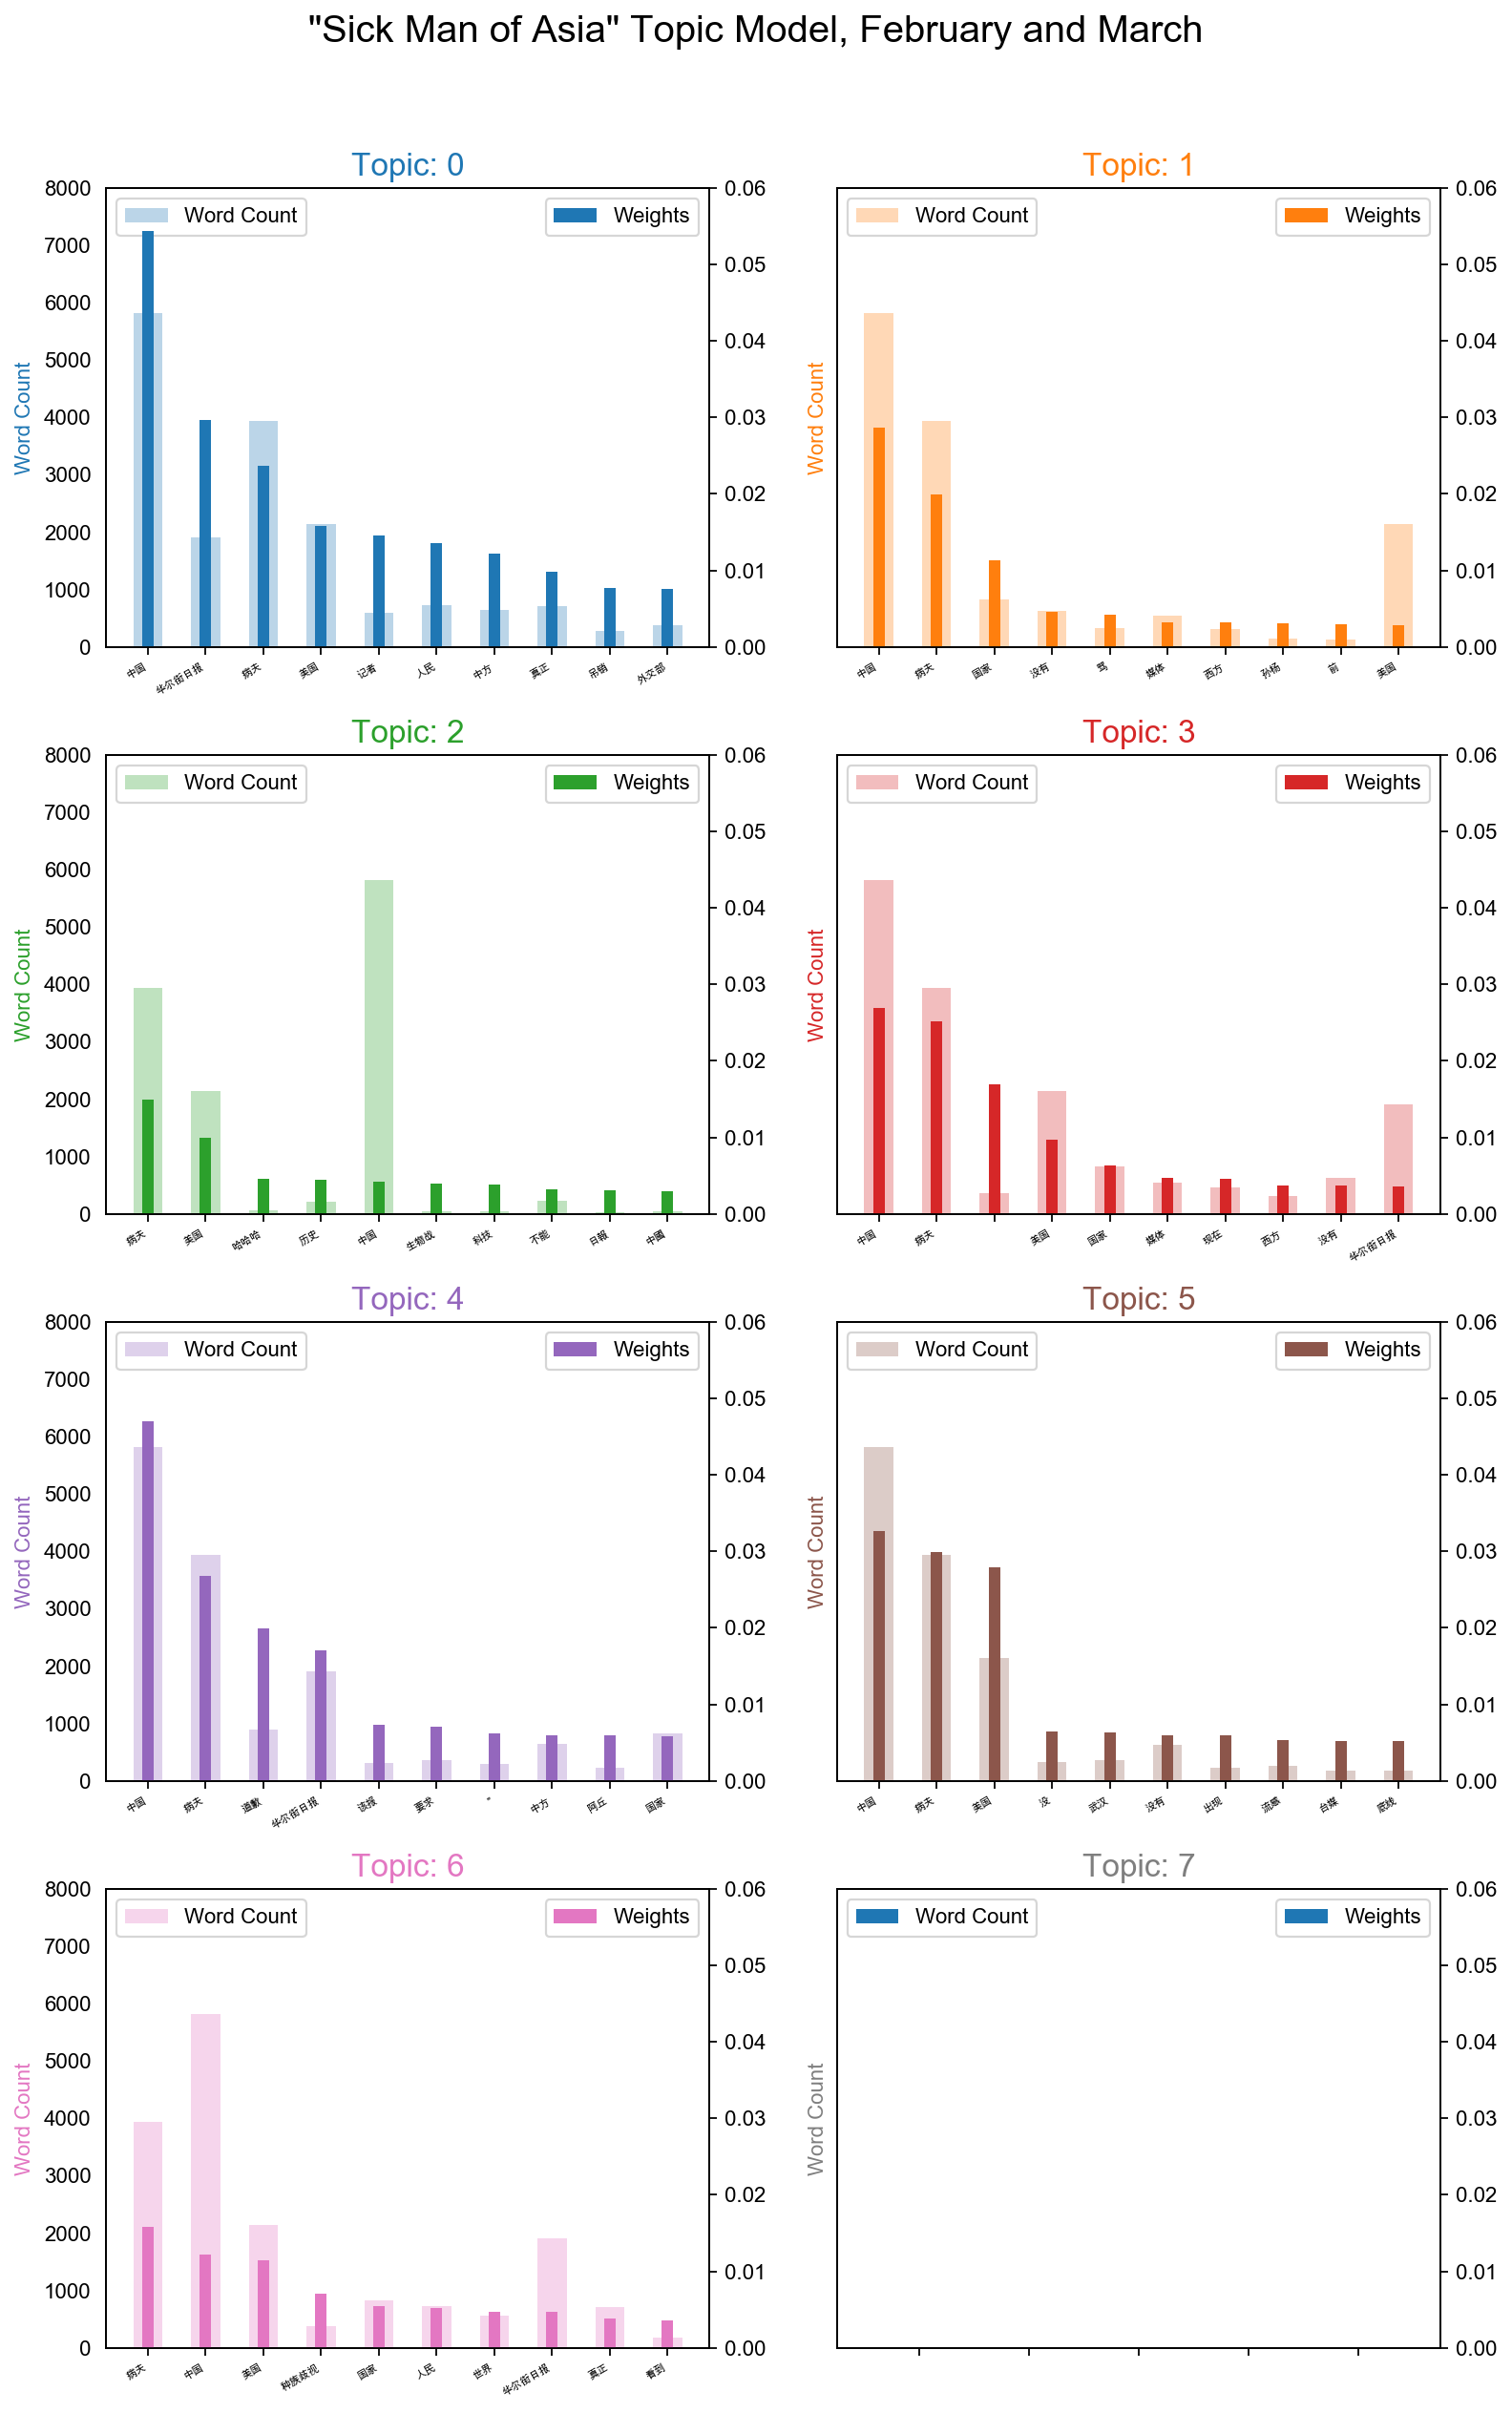

In [293]:
topic_vis(smoa_after_models[6])

In [231]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

def tsne_plot(lda_model, corpus):

    # Get topic weights
    topic_weights = []
    for i, row_list in enumerate(lda_model[corpus]):
        topic_weights.append([w for i, w in row_list[0]])

    # Array of topic weights    
    arr = pd.DataFrame(topic_weights).fillna(0).values

    # Keep the well separated points (optional)
    arr = arr[np.amax(arr, axis=1) > 0.35]

    # Dominant topic number in each doc
    topic_num = np.argmax(arr, axis=1)

    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)

    # Plot the Topic Clusters using Bokeh
    output_notebook()
    n_topics = 7
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
                  plot_width=900, plot_height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    show(plot)
    
    return

In [232]:
tsne_plot(smoa_after_models[6], smoa_corpus)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1447 samples in 0.001s...
[t-SNE] Computed neighbors for 1447 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1447
[t-SNE] Computed conditional probabilities for sample 1447 / 1447
[t-SNE] Mean sigma: 0.000269
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.137543
[t-SNE] KL divergence after 1000 iterations: 0.213332


Loading BokehJS ...

In [165]:
pprint(smoa_after_models[5].print_topics())

[(0,
  '0.048*"中国" + 0.027*"病夫" + 0.023*"华尔街日报" + 0.011*"记者" + 0.011*"美国" + '
  '0.010*"中方" + 0.009*"人民" + 0.007*"真正" + 0.006*"吊销" + 0.006*"外交部"'),
 (1,
  '0.025*"中国" + 0.023*"病夫" + 0.008*"没有" + 0.007*"国家" + 0.007*"世界" + 0.007*"阿丘" '
  '+ 0.005*"现在" + 0.005*"美国" + 0.004*"道歉" + 0.003*"央视"'),
 (2,
  '0.038*"中国" + 0.033*"美国" + 0.022*"病夫" + 0.010*"国家" + 0.006*"流感" + 0.006*"现在" '
  '+ 0.005*"没有" + 0.004*"武汉" + 0.003*"外国人" + 0.003*"西方"'),
 (3,
  '0.025*"\xa0" + 0.018*"病夫" + 0.012*"中国" + 0.009*"美国" + 0.009*"—" + '
  '0.007*"种族歧视" + 0.005*"华尔街日报" + 0.004*"历史" + 0.004*"偏见" + 0.004*"媒体"'),
 (4,
  '0.044*"中国" + 0.028*"病夫" + 0.025*"华尔街日报" + 0.015*"道歉" + 0.009*"美国" + '
  '0.008*"该报" + 0.008*"真正" + 0.008*"要求" + 0.005*"新闻" + 0.005*"员工"'),
 (5,
  '0.024*"中国" + 0.019*"病夫" + 0.013*""" + 0.006*"道歉" + 0.005*"美国" + 0.004*"妄称" '
  '+ 0.004*"接到" + 0.004*"美媒" + 0.004*"交涉" + 0.004*"中方"')]


##### Before

In [254]:
start, limit, step = 1, 11, 1
smoa_jan_models, smoa_jan_coherence, smoa_jan_best_model, smoa_jan_corpus, smoa_jan_dict = LDA_Model_Building(smoa_jan['Text'].astype(str), start, limit, step)

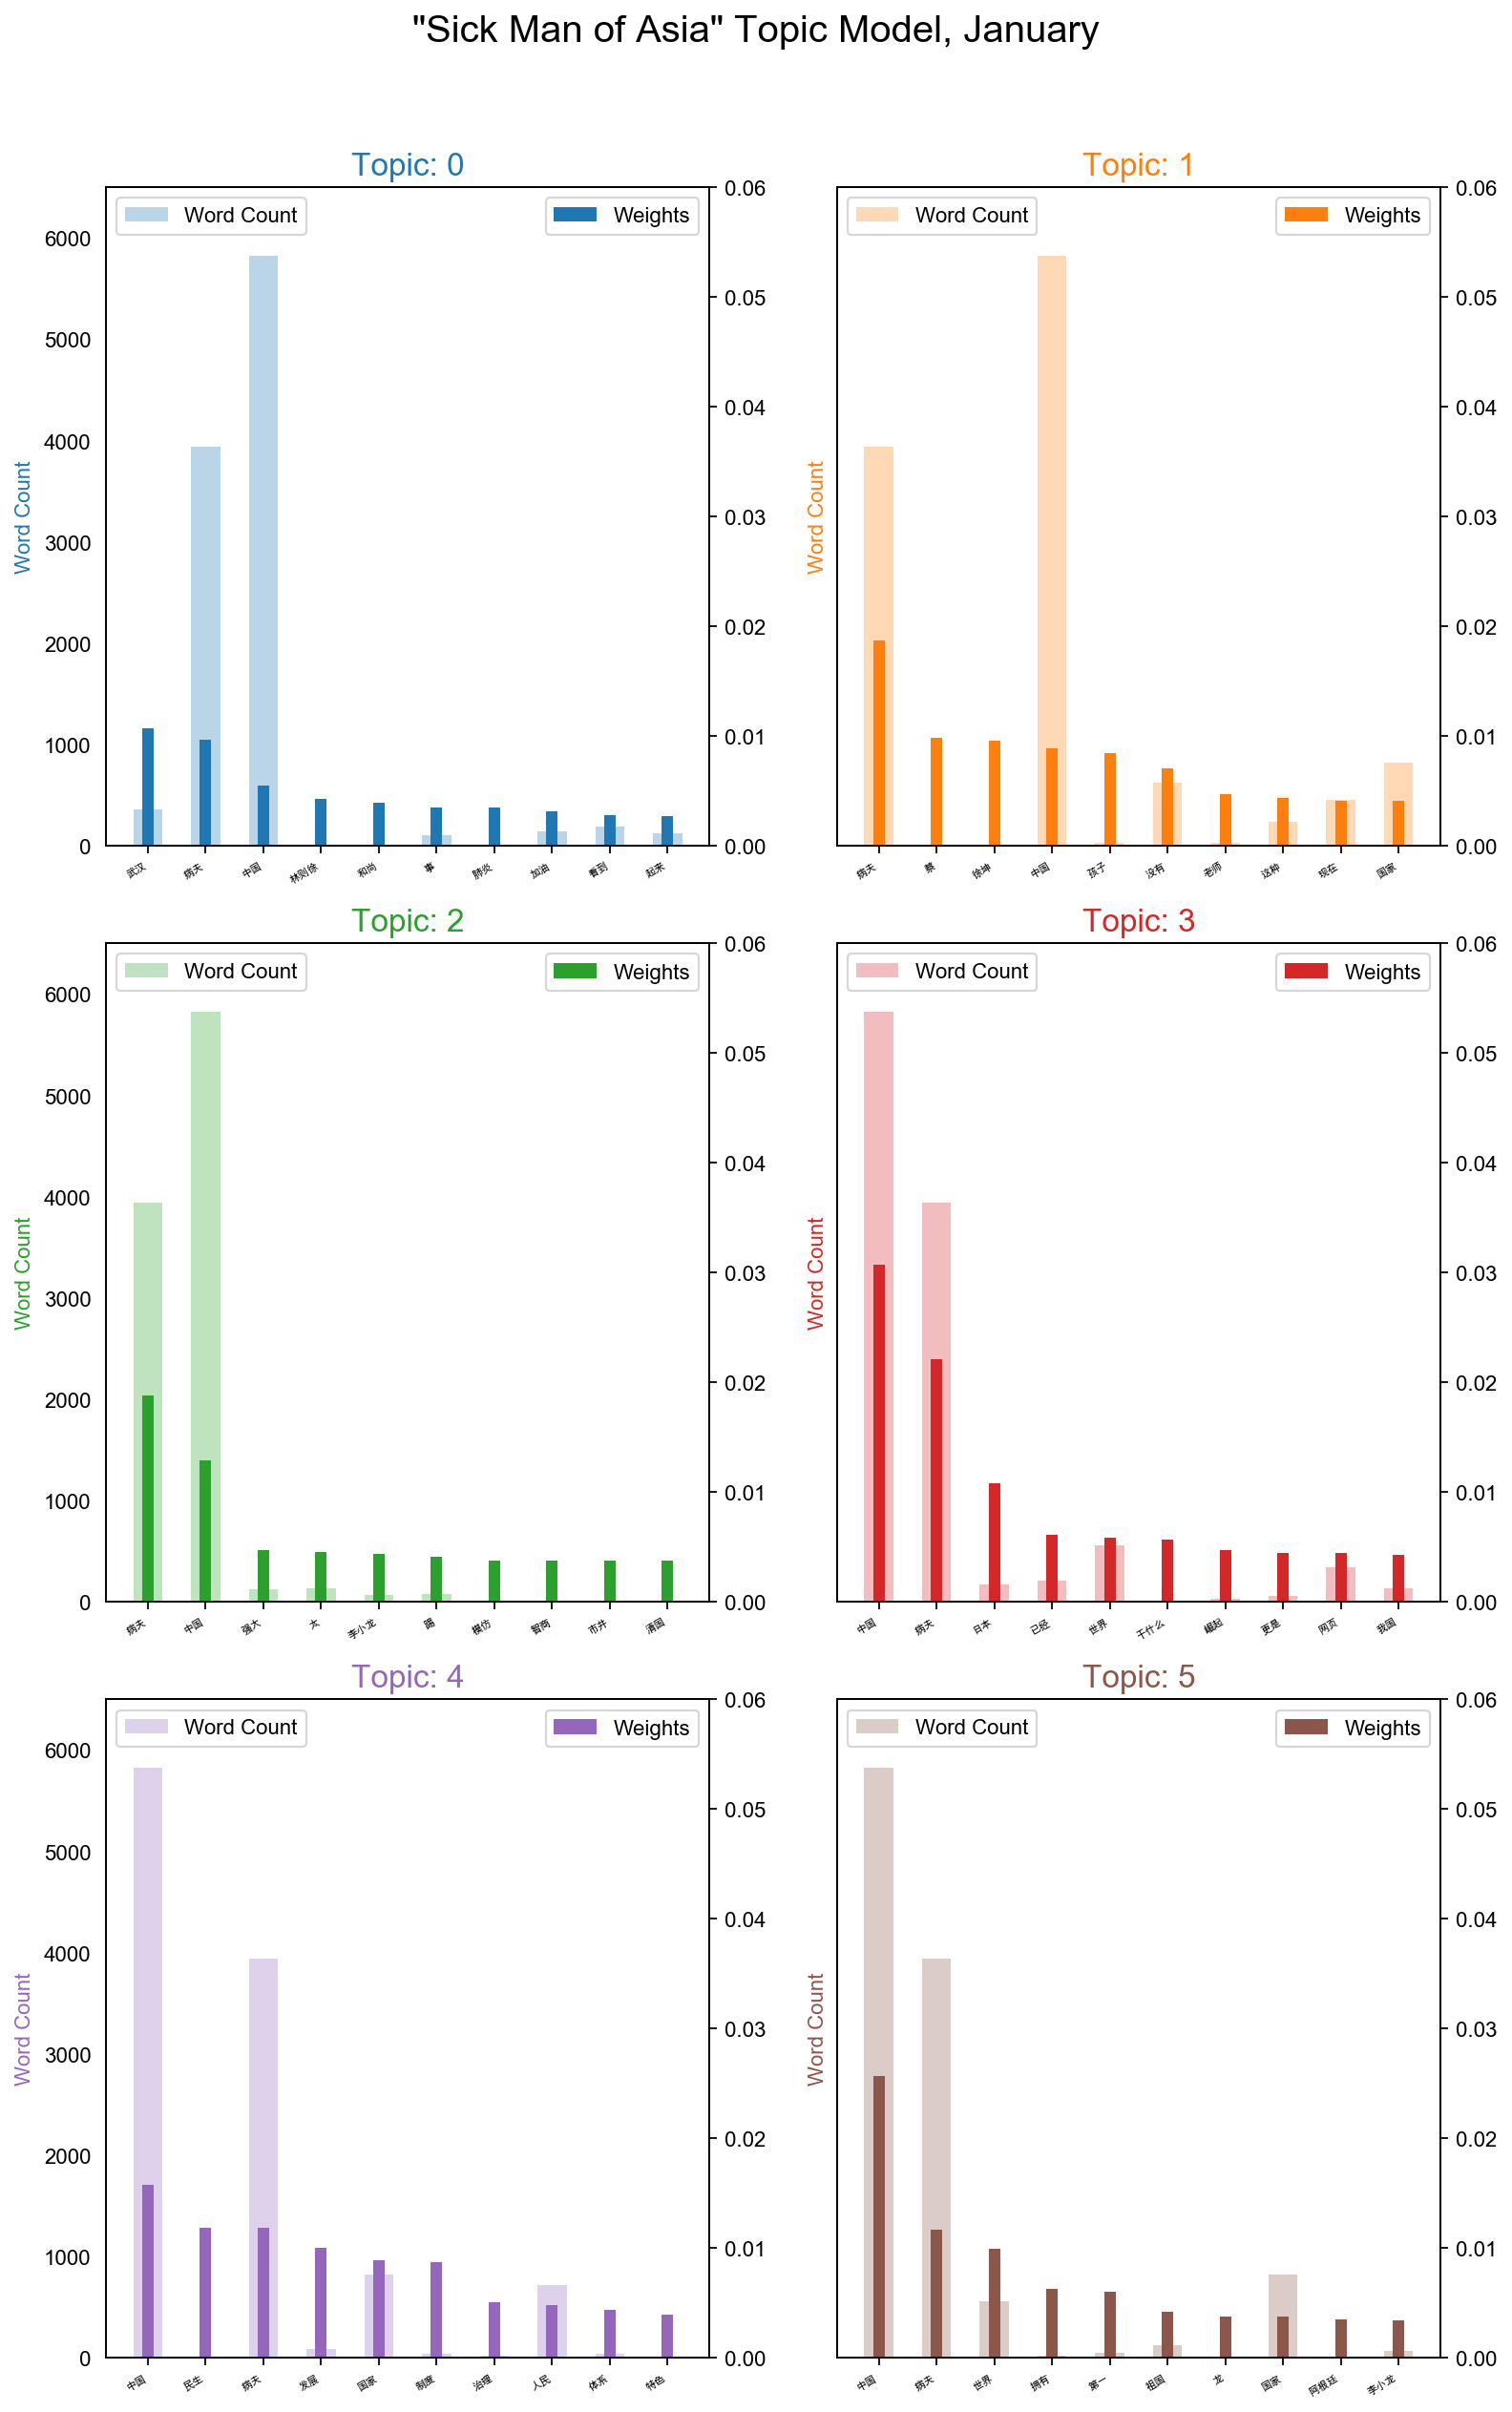

In [300]:
topic_vis(smoa_jan_models[5], 3)

In [264]:
tsne_plot(smoa_jan_best_model, smoa_jan_corpus)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 268 samples in 0.002s...
[t-SNE] Computed neighbors for 268 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 268 / 268
[t-SNE] Mean sigma: 0.002002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.418118
[t-SNE] KL divergence after 750 iterations: 0.101043


Loading BokehJS ...

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [263]:
smoa_jan_vis = pyLDAvis.gensim_models.prepare(smoa_jan_models[5], smoa_jan_corpus, smoa_jan_dict)
smoa_jan_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.170826 -0.002013       1        1  20.811435
5      0.077909 -0.004345       2        1  20.621859
3     -0.060350  0.184815       3        1  19.892425
1     -0.057956 -0.061986       4        1  14.947589
2     -0.077358 -0.084911       5        1  13.657514
0     -0.053072 -0.031560       6        1  10.069178, topic_info=     Term       Freq      Total Category  logprob  loglift
3329   民生  40.000000  40.000000  Default  30.0000  30.0000
238     蔡  24.000000  24.000000  Default  29.0000  29.0000
230    徐坤  24.000000  24.000000  Default  28.0000  28.0000
2133   制度  30.000000  30.000000  Default  27.0000  27.0000
1500   武汉  30.000000  30.000000  Default  26.0000  26.0000
...   ...        ...        ...      ...      ...      ...
194    国家   3.866452  73.005908   Topic6  -6.0539  -0.6425
210    知道   3.239725  18.669596   Topic6  -6.2307   0.5443
2506    字   3.239570  19.576557   Topic6  -6.2308   0.4968
228    应该   3.239463  17.024053   Topic6  -6.2308   0.6365
251    没有   3.239307  48.183369   Topic6  -6.2309  -0.4040

[355 rows x 6 columns], token_table=      Topic      Freq Term
term                      
367       2  0.169212   一下
367       3  0.169212   一下
367       4  0.169212   一下
367       5  0.084606   一下
367       6  0.338424   一下
...     ...       ...  ...
474       5  0.647206   鸦片
474       6  0.242702   鸦片
726       2  0.831959    龙
726       4  0.069330    龙
726       6  0.069330    龙

[598 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 2, 3, 1])

# NLTK Methods

### Analyzing RMRB Data 

In [41]:
import matplotlib
import matplotlib.pyplot as plt

#Displaying Chinese fonts

plt.rcParams["font.family"] = 'Arial Unicode MS'

a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

plt.rcParams['font.sans-serif'] = ['Arial Black'] 
plt.rcParams['axes.unicode_minus'] = False 

#Generating Frequency Distribution

plt.figure(figsize=(20, 10))

fdist_RMRB = FreqDist(RMRB_df)
fdist_RMRB.plot(20)

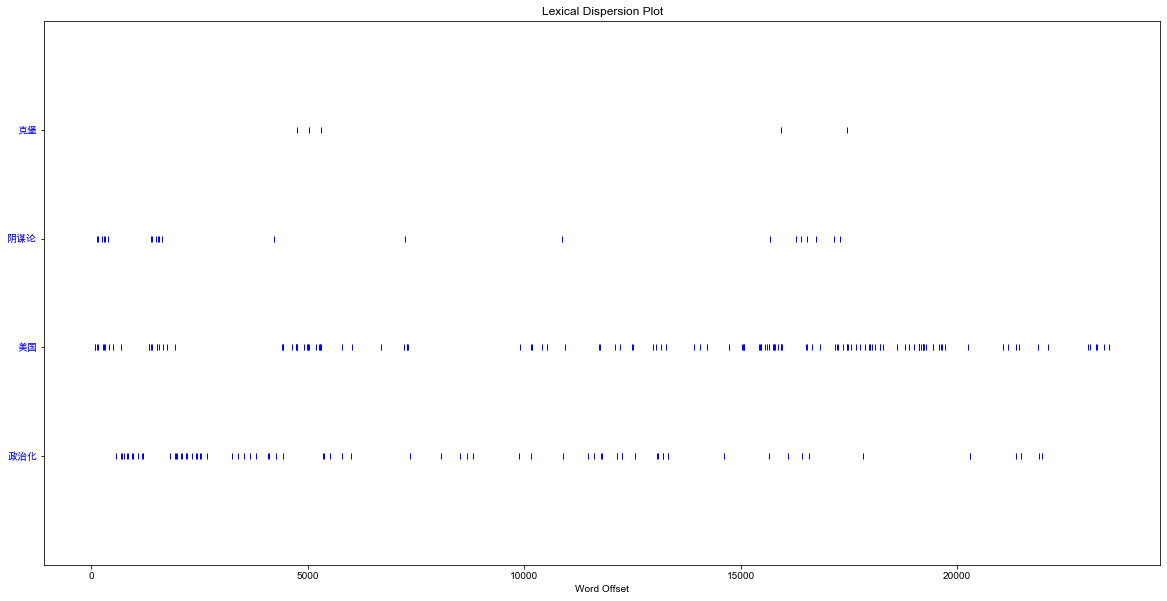

In [65]:
from nltk.draw.dispersion import dispersion_plot

targets = ['克堡','阴谋论','美国','政治化']

plt.figure(figsize=(20, 10))
dispersion_plot(RMRB_df, targets)

In [72]:
RMRB_nltk = nltk.Text(RMRB_df)
RMRB_nltk.concordance('美国')

Displaying 25 of 141 matches:
统 疾病 威斯康星州 暴发 大规模 电子 烟 疾病 这同 新冠 病毒 关系 美国 国家卫生研究院 新冠 病毒 2019 12 美国 出现 美方 对此 解释 
 这同 新冠 病毒 关系 美国 国家卫生研究院 新冠 病毒 2019 12 美国 出现 美方 对此 解释 美方 要求 情报部门 科学家 搞 溯源 研究 美方
展 溯源 研究 来源 新华社 微博 新华社 北京 6 1 日电 国际 观察 美国 新冠 溯源 阴谋论 散播 三大 病毒     　 　 新华社 记者    
合 掀起 新一轮 所谓 新冠 病毒 实验室 泄漏 阴谋论 炒作 华尔街日报 美国 媒体 日前 推波助澜 重新 炒作 新冠 病毒 溯源 话题     　 　 
 国际 专家 组成员 澳大利亚 悉尼大学 教授 多米尼克 · 德怀尔 指出 美国 情报部门 迄今 拿不出 有用 信息 拜登 情报部门 得到 报告 相互 矛盾
 情报部门 得到 报告 相互 矛盾 新华社 北京 6 1 日电 国际 观察 美国 新冠 溯源 阴谋论 散播 三大 病毒     新华社 记者     近期 
合 掀起 新一轮 所谓 新冠 病毒 实验室 泄漏 阴谋论 炒作 华尔街日报 美国 媒体 日前 推波助澜 重新 炒作 新冠 病毒 溯源 话题     事实上 
 国际 专家 组成员 澳大利亚 悉尼大学 教授 多米尼克 · 德怀尔 指出 美国 情报部门 迄今 拿不出 有用 信息 拜登 情报部门 得到 报告 相互 矛盾
家 癌症 研究所 研究 显示 新冠 病毒 2019 9 意大利 传播 巴西 美国 法国 等国 研究 机构 发现 2019 下半年 新冠 病毒 可能 国家 存
冠 病毒 溯源 严肃 复杂 科学 问题 应当 科学家 医学专家 研究 探索 美国 政客 迫不及待 病毒 标签 化 溯源 政治化 中国 污名 化 本报 布鲁塞
统 疾病 威斯康星州 暴发 大规模 电子 烟 疾病 这同 新冠 病毒 关系 美国 国家卫生研究院 新冠 病毒 2019 12 美国 出现 美方 对此 解释 
 这同 新冠 病毒 关系 美国 国家卫生研究院 新冠 病毒 2019 12 美国 出现 美方 对此 解释 美方 要求 情报部门 科学家 搞 溯源 研究 美方
展 溯源 研究 来源 新华社 微博 新华社 

### Analyzing Weibo COVID Origins Data

In [96]:
def Build_NLTK_Text(input_1):
    
    input_2 = input_1['Text'].astype(str)
    input_df = []
    
    for item in input_2:
        input_df.extend(sentence_seg(item))
        
    input_nltk = nltk.Text(input_df)
    return input_nltk

In [157]:
origins_hot_nltk = Build_NLTK_Text(origins_hot)
unit_731_hot_nltk = Build_NLTK_Text(unit_731_hot)

In [174]:
origins_hot_nltk.concordance('美国')

Displaying 25 of 720 matches:
不到 源头 互相 之间 毒株 5 已知 不同 单倍 型 古老 种 相同 5 美国 集齐 五个 古老 种 源头 真是 好好 查查 不要 排除 可能 方向 越查
焦 肺炎 疫情 世面 拍 视频 美股 继续 大跌 道琼斯 指数 跌近 千点 美国 资本 市场 担心 看看 台 湾 电视节目 分析 肺炎 源头 分析 头头是道
目 分析 肺炎 源头 分析 头头是道 颠覆 认知 猜 怎么着 最终 追溯到 美国 财 入门 微博 视频 中国 伊朗 派出 疾控 专家组 伊朗 新增 10 例
中国 对不起 世界 中国 道歉 杂种 急急忙忙 跳 中国 道歉 无非 呼应 美国 打压 中国 目前为止 信息 来看 肺炎 源头 到底 说不清楚 可能 根本 
中国 对不起 世界 中国 道歉 杂种 急急忙忙 跳 中国 道歉 无非 呼应 美国 打压 中国 目前为止 信息 来看 肺炎 源头 到底 说不清楚 可能 根本 
宝贵 时间 丰富 治疗 经验 一点 中国 人民 英雄 第三 无国界 受害者 美国 猪 流感 美国 流感 肆虐 全球 要求 美国 道歉 杂种 敢 美国 爸爸 
 治疗 经验 一点 中国 人民 英雄 第三 无国界 受害者 美国 猪 流感 美国 流感 肆虐 全球 要求 美国 道歉 杂种 敢 美国 爸爸 道歉 第四 中国
 英雄 第三 无国界 受害者 美国 猪 流感 美国 流感 肆虐 全球 要求 美国 道歉 杂种 敢 美国 爸爸 道歉 第四 中国 透明 姿态 共享 肺炎 疫情
受害者 美国 猪 流感 美国 流感 肆虐 全球 要求 美国 道歉 杂种 敢 美国 爸爸 道歉 第四 中国 透明 姿态 共享 肺炎 疫情 数据 全世界 防控 
异 演进 路径 发现 1 华南 海鲜 市场 可能 病毒传播 人类 源头 2 美国 华盛顿州 病患 美国 首例 瑞德 西韦 试验 H38 展开 全文 c 全国
1 华南 海鲜 市场 可能 病毒传播 人类 源头 2 美国 华盛顿州 病患 美国 首例 瑞德 西韦 试验 H38 展开 全文 c 全国 累计 确诊 肺炎 7
异 演进 路径 发现 1 华南 海鲜 市场 可能 病毒传播 人类 源头 2 美国 华盛顿州 病患 美国 首例 瑞德 西韦 试验 H38 类型 12 月底 武
1 华南 海鲜 市场 可能 病毒传播 人类 

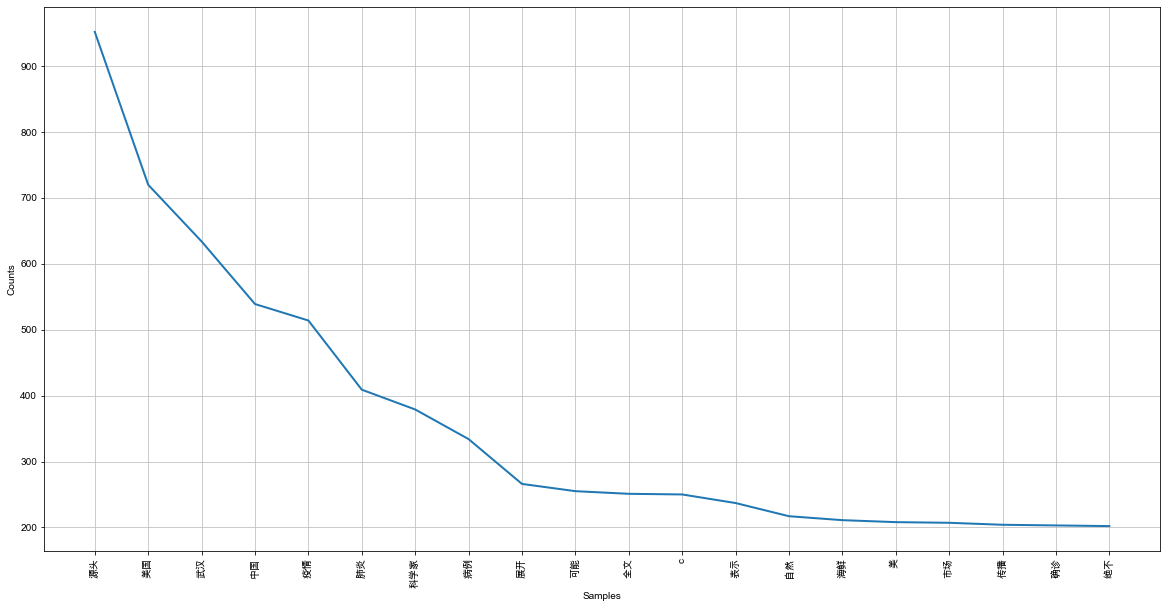

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [182]:
fdist_origins_hot = FreqDist(origins_hot_nltk)

plt.figure(figsize=(20, 10))
fdist_origins_hot.plot(20)

### Analyzing SMOA

In [97]:
smoa_nltk = Build_NLTK_Text(smoa)

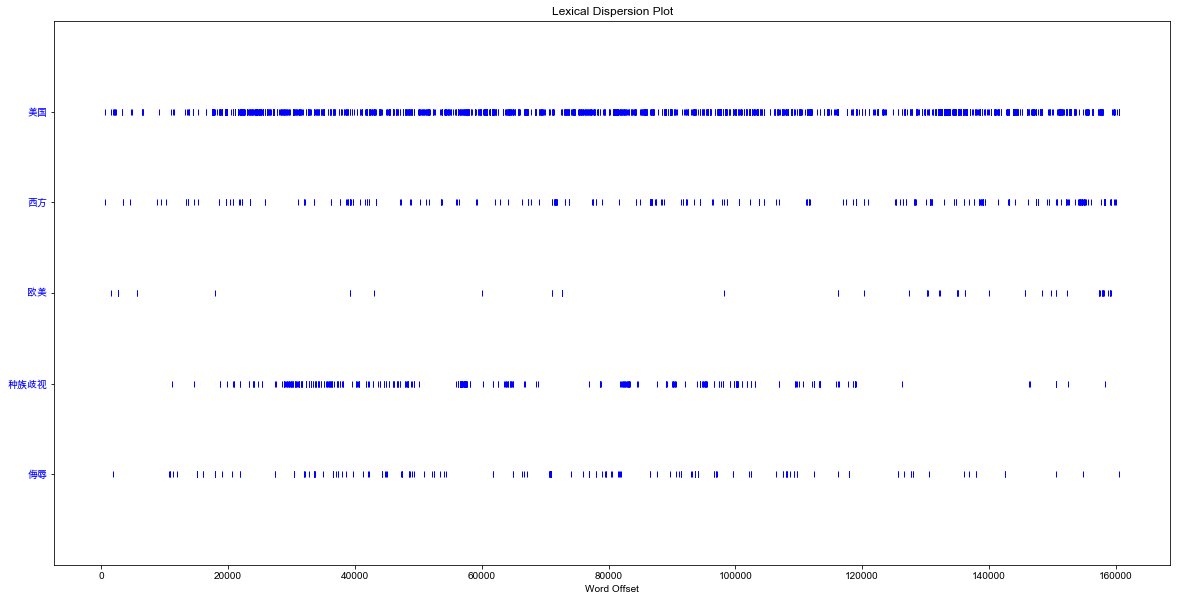

In [98]:
targets = ['美国','西方','欧美','种族歧视','侮辱']
plt.figure(figsize=(20, 10))
dispersion_plot(smoa_nltk, targets)

##### After

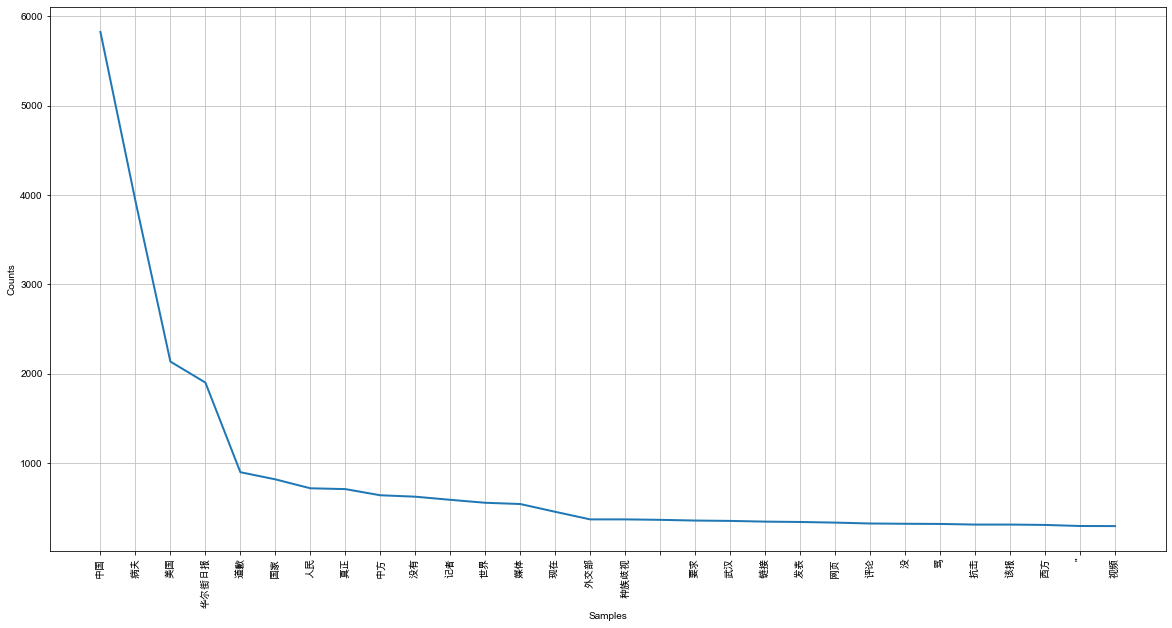

In [42]:
smoa_after_nltk = Build_NLTK_Text(smoa_after)
fdist_smoa_after = FreqDist(smoa_after_nltk)

plt.figure(figsize=(20, 10))
fdist_smoa_after.plot(30)

In [47]:
smoa_concordance = smoa_after_nltk.concordance('病夫', width=20, lines=1100)
smoa_concordance

Displaying 1100 of 3936 matches:
年 前 国家 贴 病夫 牌子 国家 强大
人 台媒用 中国 病夫 祸 全球 作 引
美国 真正 美洲 病夫 俄罗斯 老铁 '
6.9 万 十足 病夫 国家 人权 皮肤
喊 几句 x 国 病夫 今早 看到 人民
题为 中国 真正 病夫 辱华 翻 链接 
 Asia 确实 病夫 翻译 说成 中国
题为 中国 真正 病夫 辱华 翻 链接 
 Asia 确实 病夫 翻译 说成 中国
an 美国 再度 病夫 形容 中国 只能
 意思 道歉 变 病夫 很多 方便面 不
关 部门 干什么 病夫 难道 祖祖辈辈 
字幕 竟现 中国 病夫 网页 链接 华尔
 了解 " 真正 病夫 " 词有 历史 
 了解 " 真正 病夫 " 词有 历史 
送 口罩 一分钱 病夫 傻 B 送到 美
帮 哇塞 洗美爹 病夫 洗成 尊重事实 
这帮 孙子 嘲笑 病夫 封城 侵犯 人身
发表 中国 真正 病夫 冒犯 道歉 该报
发表 中国 真正 病夫 冒犯 道歉 该报
 地说 中国 摘 病夫 帽子 欠 世界 
中國 真正 東亞 病夫 」 為題 拒 道
分享 知道 所谓 病夫 状态 知道 生病
分享 知道 所谓 病夫 状态 知道 生病
奔驰 一世 之殇 病夫 懦夫 中国 消费
奔驰 一世 之殇 病夫 懦夫 中国 消费
街日报 中国 ″ 病夫 ″ 拒 道歉 蓬
徐州 歧视 中国 病夫 医疗 落后 得病
加上 中国 真正 病夫 这种 带有 种族
加上 中国 真正 病夫 这种 带有 种族
 变化 发育不良 病夫 身体 激素 分泌
 变化 发育不良 病夫 身体 激素 分泌
 咎由自取 美州 病夫 死美帝 美 鬼子
 : 中国 真正 病夫 中国政府 人民 
 : 中国 真正 病夫 中国政府 人民 
 : 中国 真正 病夫 严重 侵犯 中国
竟然 中国 真正 病夫 百年之后 中国 
 竟 出现 中国 病夫 ~ 大陆 敏感 
 竟 出现 中国 病夫 ~ 大陆 敏感 
 竟 出现 中国 病夫 没 底线 台媒 
 竟 出现 中国 病夫 台当局 使用 歧
当下 滥用 中国 病夫 一词 没 底线 
 竟 出现 中国 病夫 台当局 使用 歧
当下 滥用 中国 病夫 一词 　 观察者
 所谓 ‘ 中国 病夫 ’ 祸 全球 加
情绪 完全 忘记 病夫 一词 背后 隐含
 

In [76]:
def concordance(ci, word, width=20, lines=4000):
    
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context

    results = []
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results.append('%s %s %s' % (left, ci._tokens[i], right))
            lines -= 1

    return results

In [77]:
from  nltk.text import ConcordanceIndex

ci = ConcordanceIndex(smoa_after_nltk)
smoa_con_list = concordance(ci, '病夫')

In [83]:
smoa_con_list_nltk = Build_NLTK_Text(smoa_con_list)

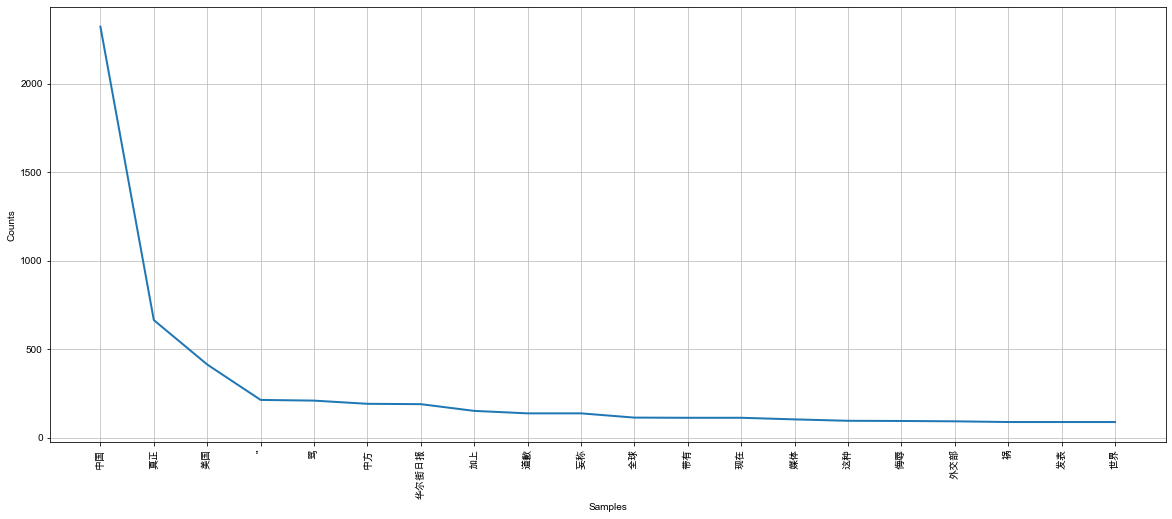

In [86]:
smoa_con_list_fdist = FreqDist(smoa_con_list_nltk)

plt.figure(figsize = (20, 8))
smoa_con_list_fdist.plot(20)

##### Before

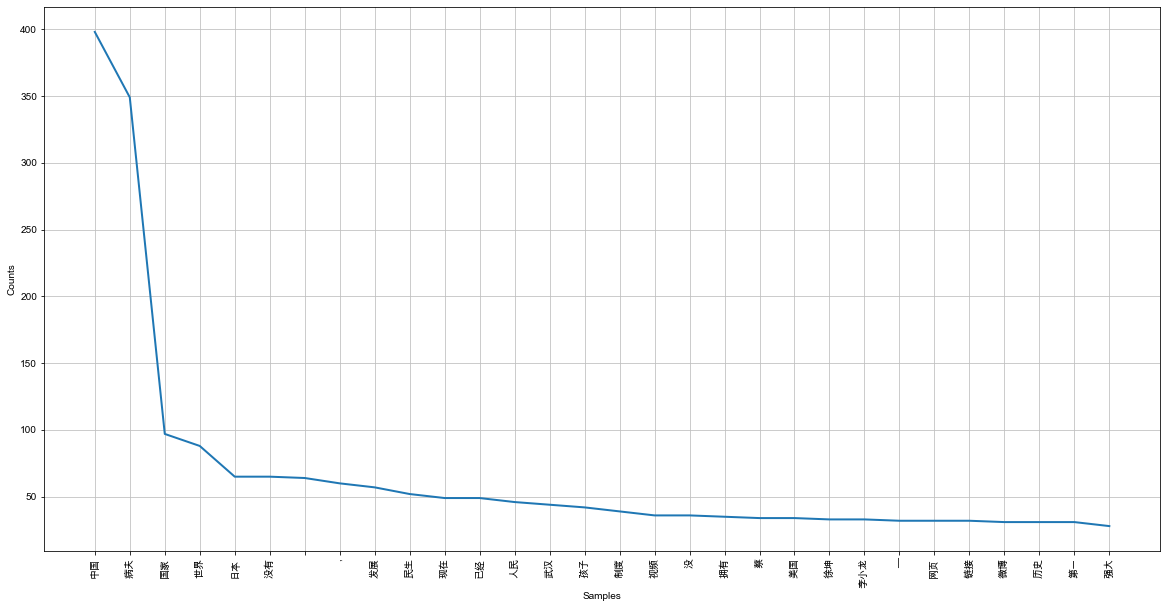

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [399]:
smoa_jan_nltk = Build_NLTK_Text(smoa_jan)
fdist_smoa_jan = FreqDist(smoa_jan_nltk)

plt.figure(figsize=(20, 10))
fdist_smoa_jan.plot(30)